### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
%matplotlib inline

### Gradient descent class

In [2]:
class GD:
    def __init__(self, lr=0.0001, max_iter=1000, batch_size=1, shuffle=True):
        self.lr = lr
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.shuffle = shuffle
    
    # Hypothesis function
    def predict(self, theta, x):
        return x @ theta
    
    # Loss function
    def J(self, prediction, y):
        n = self.batch_size
        error_vec = prediction - y
        loss = (0.5 / n ) * (error_vec.T @ error_vec)[0][0]

        return loss, error_vec
    
    @staticmethod
    def reshape(x):
        x = np.block([np.ones((x.shape[0], 1)), x])
        return x
    
    @staticmethod
    def chunks(x, y, size, shuffle):
        if shuffle:
            data = np.block([x, y])
            np.random.shuffle(data)
            x = data[:, : -1]
            y = data[:, [-1]]
        
        for i in range(0, x.shape[0], size):
            yield x[i:i + size], y[i:i + size]
        
    
    # Gradient descent algorithm
    def fit(self, x, y):
        
        x = GD.reshape(x)
        
        # Number of features (X)
        n = x.shape[1]
        theta = np.zeros((n, 1))
        
        # Lists for holding loss and model parameters
        MSE = []
        th = []
        
        # No. of iterations per epoch
        n_iter_per_epoch = int(x.shape[0] / self.batch_size)

        for epoch in range(self.max_iter):
            
            # generator
            batches = GD.chunks(x, y, self.batch_size, self.shuffle)
            
            for i in range(n_iter_per_epoch):

                current_batch = next(batches)
                batch_x = current_batch[0]
                batch_y = current_batch[1]
                
                
                if len(batch_x) == 0:
                    break

                # Predicted value of output
                y_pred = self.predict(theta, batch_x)

                # Calculate loss
                loss, e = self.J(y_pred, batch_y)
                
                # Append loss and thetas for current epoch
                if i == (n_iter_per_epoch - 1): 
                    th.append(theta)
                    MSE.append(loss)

                # Gradient of loss function with respect to theta
                grad_theta = (batch_x.T @ e) * (1 / self.batch_size)     
                
                # Update theta
                theta = theta - self.lr * grad_theta  

            # Stopping criteria
            # Gradient approaches zero
            if np.linalg.norm(grad_theta) < 0.001:
                break

            # Change in loss approaches zero
            elif epoch != 0:
                if abs(loss - MSE[epoch - 1]) < 0.001:
                    break

            
        return th, MSE

### Plotting functions

In [3]:
def reg_line(x, y, y_pred):   
    plt.scatter(x, y, label='Actual') 
    plt.title('Regression line')
    plt.plot(x, y_pred, color='red', label='Predicted')  # regression line
    plt.xlabel("Input (x)")
    plt.ylabel("Output (y)")
    plt.grid()
    plt.legend()
    plt.show()

In [4]:
def lossVSepoch(loss):
    print("MSE = ", loss[-1])
    plt.plot(np.array(loss), '--bo', mfc='r', mec='none', markersize=5)
    plt.title('loss')
    plt.xlabel("No. of epochs (e)")
    plt.ylabel("Loss (J)")
    plt.grid()
    plt.show()

In [5]:
def thetaVSloss(th, loss, i):
    plt.plot(th, loss, '--bo', mfc='red', mec='none', markersize=5)
    plt.title('Loss vs theta {}'.format(i))
    plt.xlabel('theta {}'.format(i))
    plt.ylabel('J(theta {})'.format(i))
    plt.grid()
    plt.show()

## Multivariable trial

### Loading data

In [6]:
# Dataframe from csv file
df = pd.read_csv('MultipleLR.csv', header=None)
data = df.to_numpy()

print("Shape of data: ", data.shape)
data

Shape of data:  (25, 4)


array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175],
       [ 76,  83,  71, 149],
       [ 96,  93,  95, 192]], dtype=int64)

In [7]:
y = data[:, [-1]]
x = data[:, 0:3]
x

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70],
       [ 53,  46,  55],
       [ 69,  74,  77],
       [ 47,  56,  60],
       [ 87,  79,  90],
       [ 79,  70,  88],
       [ 69,  70,  73],
       [ 70,  65,  74],
       [ 93,  95,  91],
       [ 79,  80,  73],
       [ 70,  73,  78],
       [ 93,  89,  96],
       [ 78,  75,  68],
       [ 81,  90,  93],
       [ 88,  92,  86],
       [ 78,  83,  77],
       [ 82,  86,  90],
       [ 86,  82,  89],
       [ 78,  83,  85],
       [ 76,  83,  71],
       [ 96,  93,  95]], dtype=int64)

#### Train/test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Model initialization

In [9]:
# Batch : batch size = 20
# Stochastic : batch size = 1
model = GD(lr=0.00001, max_iter=100, batch_size=20, shuffle=True)

### Model training

In [10]:
theta, loss = model.fit(X_train, y_train)

In [11]:
loss[-1]

6.550494769541988

In [12]:
theta[-1]

array([[0.00818338],
       [0.66229158],
       [0.6667076 ],
       [0.70072477]])

#### Training graphs

MSE =  6.550494769541988


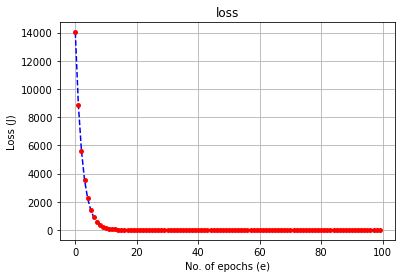

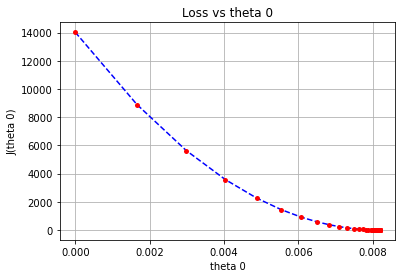

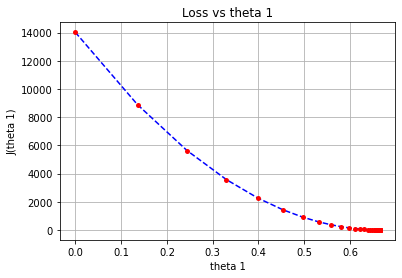

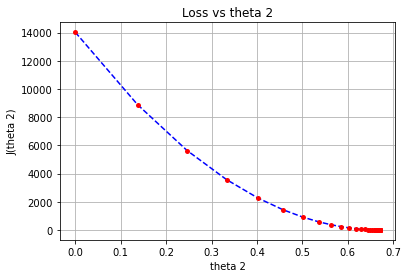

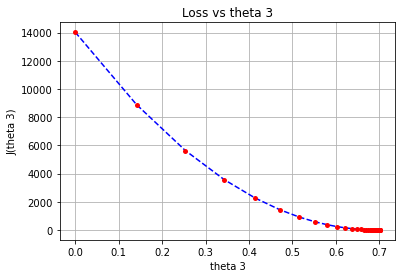

In [13]:
lossVSepoch(loss)

thetaVSloss(np.array(theta)[:, [0], [0]], loss, 0)
thetaVSloss(np.array(theta)[:, [1], [0]], loss, 1)
thetaVSloss(np.array(theta)[:, [2], [0]], loss, 2)
thetaVSloss(np.array(theta)[:, [3], [0]], loss, 3)

#### Training evaluation

In [14]:
y_pred = model.predict(theta[-1], GD.reshape(X_train))
print(f'The r2_score for training is {r2_score(y_train, y_pred)}')

The r2_score for training is 0.9702606771675231


### Predictions

In [15]:
y_pred = model.predict(theta[-1], GD.reshape(X_test))
y_pred

array([[104.31804912],
       [182.68775501],
       [160.95946482],
       [149.31928111],
       [141.55822102]])

In [16]:
y_test

array([[101],
       [180],
       [159],
       [147],
       [141]], dtype=int64)

#### Test evaluation

In [17]:
print(f'The r2_score for test is {r2_score(y_test, y_pred)}')

The r2_score for test is 0.9917742193484818


## Single variable trial

### Loading data

In [18]:
# Dataframe from csv file
df = pd.read_csv('data.csv')
data = df.to_numpy()

print("Shape of data: ", data.shape)
data

Shape of data:  (20, 2)


array([[ -0.33532,   6.66854],
       [  0.0216 ,   3.86398],
       [ -1.19438,   5.16161],
       [ -0.65046,   8.43823],
       [ -0.28001,   5.57201],
       [  1.93258, -11.1327 ],
       [  1.2262 ,  -5.31226],
       [  0.74727,  -4.63725],
       [  3.32853,   3.8065 ],
       [  2.87457,  -6.06084],
       [ -1.48662,   7.22328],
       [  0.37629,   2.38887],
       [  1.43918,  -7.13415],
       [  0.24183,   2.00412],
       [ -2.7914 ,   4.29794],
       [  1.08176,  -5.86553],
       [  2.81555,  -5.20711],
       [  0.54924,  -3.52863],
       [  2.36449, -10.16202],
       [ -1.01925,   5.31123]])

In [19]:
y = data[:, [-1]]
x = data[:, [0]]
x

array([[-0.33532],
       [ 0.0216 ],
       [-1.19438],
       [-0.65046],
       [-0.28001],
       [ 1.93258],
       [ 1.2262 ],
       [ 0.74727],
       [ 3.32853],
       [ 2.87457],
       [-1.48662],
       [ 0.37629],
       [ 1.43918],
       [ 0.24183],
       [-2.7914 ],
       [ 1.08176],
       [ 2.81555],
       [ 0.54924],
       [ 2.36449],
       [-1.01925]])

#### Train/test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Model initialization

In [21]:
# Batch : batch size = 16
# Stochastic : batch size = 1
model = GD( 0.0005, 50000, 16)

### Model training

In [22]:
theta, loss = model.fit(X_train, y_train)

In [23]:
loss[-1]

6.9613412093547655

In [24]:
# Final model parameters
theta[-1]

array([[ 0.15513898],
       [-2.6106161 ]])

#### Training graphs

MSE =  6.9613412093547655


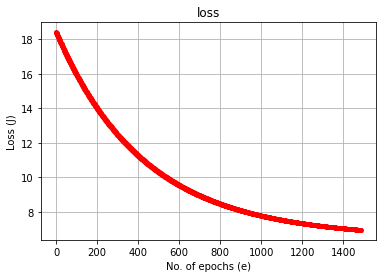

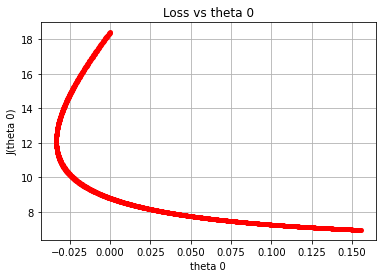

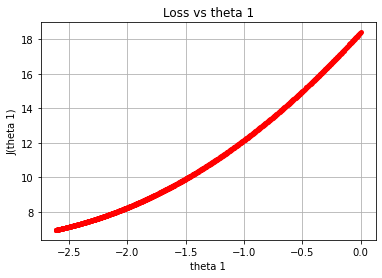

In [25]:
lossVSepoch(loss)

thetaVSloss(np.array(theta)[:, [0], [0]], loss, 0)
thetaVSloss(np.array(theta)[:, [1], [0]], loss, 1)

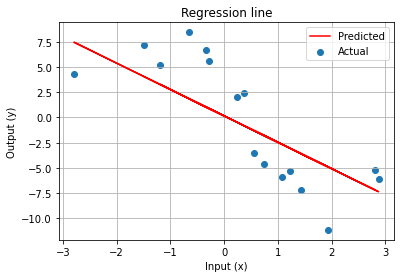

In [26]:
y_pred = model.predict(theta[-1], GD.reshape(X_train))
reg_line(X_train, y_train, y_pred)

#### Training evaluation

In [27]:
print(f'The r2_score for training is {r2_score(y_train, y_pred)}')

The r2_score for training is 0.619743531729719


### Predictions

In [28]:
y_pred = model.predict(theta[-1], GD.reshape(X_test))
y_pred

array([[-6.01763668],
       [ 0.09874967],
       [ 2.81600944],
       [-8.53437502]])

In [29]:
y_test

array([[-10.16202],
       [  3.86398],
       [  5.31123],
       [  3.8065 ]])

#### Test evaluation

In [30]:
print(f'The r2_score for test is {r2_score(y_test, y_pred)}')

The r2_score for test is -0.19488176597111218
